<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/Tasks/ML1_S3_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S3 (Assignment)
----

## Problem 1: Polynomial Regression 
---
You want to buy huge amount of chocolates to build a chocolate house, every room in this chocolate house should be made of different types of high quality chocolates. There is only one place to buy this amount of chocolate, the "Chocolate City" of 1000 different factories and famous for its cheating prices. Chocolate Merchants Association has provided a price sheet `chocolate_data.csv` to beat the deception for 10 types of quality, the prices are per kg, but there are quality types in the market that are not mentioned in the sheet. Build a **`regression model`** that predicts the price per kilogram, and says if you want 1000kg with a quality type called "3.5" what is the price?

In [48]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# to make sure all students have the same results 
random_val = 123
#import the train test split function
from sklearn.model_selection import train_test_split
#import the linear regression function
from sklearn.linear_model import LinearRegression
#import metrics
from sklearn import metrics

In [81]:
dataset_path = '/content/data.csv'
df = pd.read_csv(dataset_path)
df.head()


,quality,chocolate,price
0,10,1,450
1,9,2,500
2,8,3,600
3,7,4,800
4,6,5,1100


In [82]:
df.price	

0      450
1      500
2      600
3      800
4     1100
5     1500
6     2000
7     3000
8     5000
9    10000
Name: price, dtype: int64

In [83]:
df.describe()

,quality,chocolate,price
count,10.00000,10.00000,10.000000
mean,5.50000,5.50000,2495.000000
std,3.02765,3.02765,2993.738837
min,1.00000,1.00000,450.000000
25%,3.25000,3.25000,650.000000
50%,5.50000,5.50000,1300.000000
75%,7.75000,7.75000,2750.000000
max,10.00000,10.00000,10000.000000


In [84]:
#Setting the value for X and Y
x = df[['quality', 'chocolate']]
y = df['price']

In [102]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)

In [103]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [104]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  2731.756756756756
Coefficients:


[('quality', -424.099099099099), ('chocolate', 424.09909909909913)]

In [105]:
# Regression Equation:  Price =  2731.756756756756+ ( -424.099099099099 * quality) + ( 424.09909909909913* chocolate)

In [106]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [5700.45045045  611.26126126 3155.85585586]


In [107]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
8,5000,5700.450450
2,600,611.261261
5,1500,3155.855856


In [108]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)


R squared: 66.05
Mean Absolute Error: 789.1891891891893
Mean Square Error: 1077538.7549711876
Root Mean Square Error: 1038.0456420462385


In [110]:
new_df=df.copy()
x = new_df['quality']
y = new_df['price']


In [127]:
print(new_df.head())


   quality  chocolate  price
0       10          1    450
1        9          2    500
2        8          3    600
3        7          4    800
4        6          5   1100


0      450
1      500
2      600
3      800
4     1100
5     1500
6     2000
7     3000
8     5000
9    10000
Name: price, dtype: int64

In [112]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [113]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

In [114]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

In [115]:
B0 = y_mean - (B1 * x_mean)


In [116]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [117]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = 6943.333333333333 + -808.788β
Correlation Coef.:  -0.8179494074776198
"Goodness of Fit":  0.6690412331929894


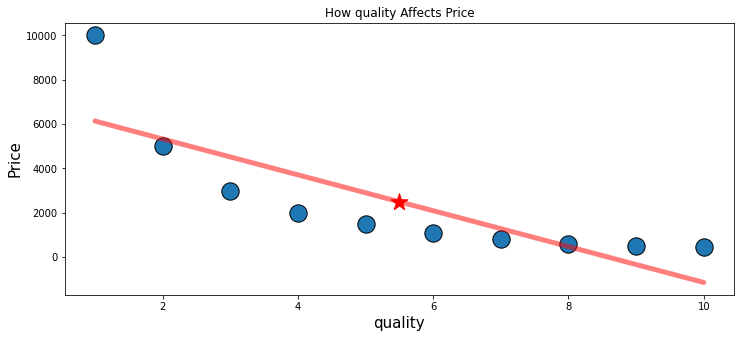

In [129]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
plt.title('How quality Affects Price')
plt.xlabel('quality', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r')

Estimated coefficients:
b0 = 6943.333333333333 		
b1 = -808.7878787878788
Estimated eqution: Price = 6943.333333333333 + 	quality* -808.7878787878788
Please Enter the quality ??0
price is : 6943.333333333333


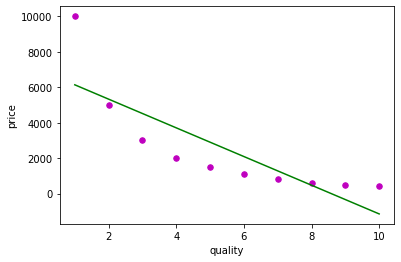

In [143]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	# plotting the actual points as scatter plot
	plt.scatter(x, y, color = "m",
			marker = "o", s = 30)

	# predicted response vector
	y_pred = b[0] + b[1]*x

	# plotting the regression line
	plt.plot(x, y_pred, color = "g")

	# putting labels
	plt.xlabel('quality')
	plt.ylabel('price')

	# function to show plot
  
	plt.show()

def main():
	# observations / data
 x = np.array([10, 9, 8, 7, 6, 5, 4, 3, 2, 1])
 y = np.array([450, 500, 600, 800, 1100, 1500, 2000, 3000, 5000, 10000])

	# estimating coefficients
 b = estimate_coef(x, y)
 print("Estimated coefficients:\nb0 = {} \
		\nb1 = {}".format(b[0], b[1]))
 
 print("Estimated eqution: Price = {} + \
	quality* {}".format(b[0], b[1]))
	# plotting regression line
 quality=(int(input("Please Enter the quality ??")))
 price= 6943.333333333333 +(-808.7878787878788*quality)
 print("price is :",price )
 plot_regression_line(x, y, b)



if __name__ == "__main__":
	main()


## Problem 2: SVR
---
Build **`SVR model`** on the chocolate dataset `chocolate_data.csv` and provide the output graph showing the predictions of prices vs quality levels.

In [144]:
### Start Your Code Here ####
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### End Your Code Here ####

In [156]:
 
dataset = pd.read_csv('/content/data.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

In [157]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)


In [159]:
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [163]:
#5 Predicting a new result
y_pred = regressor.predict(6)

ValueError: ignored

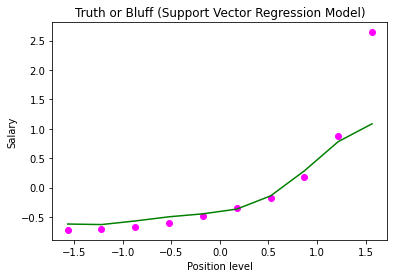

In [164]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [165]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [166]:
#5 Predicting a new result
y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))

ValueError: ignored

In [170]:
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [176]:
dataset = pd.read_csv('/content/data.csv')
X = dataset.iloc[:, 1:2].values.reshape(1,-1)
y = dataset.iloc[:, 2].values.reshape(1,-1)

In [177]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [205]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#2 Importing the dataset
dataset = pd.read_csv('/content/data.csv')
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
#4 Fitting the Support Vector Regression Model to the dataset
# Create your support vector regressor here
from sklearn.svm import SVR
# most important SVR parameter is Kernel type. It can be #linear,polynomial or gaussian SVR. We have a non-linear condition #so we can select polynomial or gaussian but here we select RBF(a #gaussian type) kernel.
regressor = SVR(kernel='rbf')
regressor.fit(X,y)
#5 Predicting a new result
# y_pred = regressor.predict(6.5)
# y_pred = regressor.predict(np.array([6.5]))
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1,-1))



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


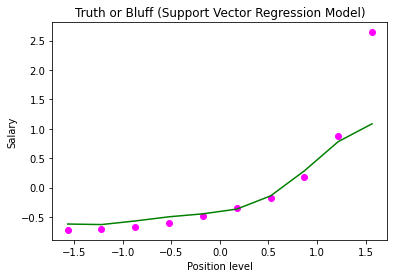

In [188]:
#6 Visualising the Support Vector Regression results
plt.scatter(X, y, color = 'magenta')
plt.plot(X, regressor.predict(X), color = 'green')
plt.title('Truth or Bluff (Support Vector Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [189]:
#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [193]:
#5 Predicting a new result
# y_pred = sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[6.5]])))))
# Predicting a new result
# some_data_array=1
# y_pred = regressor.predict(some_data_array)
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(1,-1))


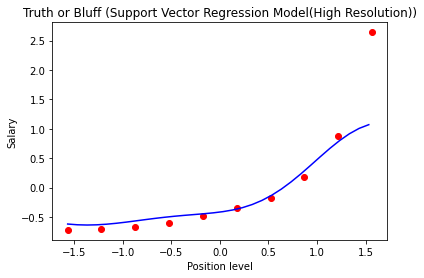

In [195]:
#6 Visualising the Regression results (for higher resolution and #smoother curve)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid, regressor.predict(X_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()